## AIML CA1 
Name: Chiam Joon Wee <br>

Class: DAAA/FT/2A/05 <br>

<h3> Credit dataset (classification) </h3>

This is a dataset collected from a financial company, it contains 1600 data points with 13 columns.

Customer ID: Unique customer identifier ranging from 1 to 1600 <br>
Credit Limit: The  credit limit for the customer <br>
Gender: Customer gender <br>
Education: Customer education level <br>
Marriage Status: Customer marital status <br>
Age: Rotational Customer age <br>
Bill_Amount1: Customer credit card bill amount 1 month ago <br>
Bill_Amount2: Customer credit card bill amount 2 month ago <br>
Bill_Amount3: Customer credit card bill amount 3 month ago <br>
Pay_Amount1: The amount customer paid 1 month ago <br>
Pay_Amount2: The amount customer paid 2 month ago <br>
Pay_Amount3: The amount customer paid 3 month ago <br>
Default payment next month: Whether customer will default next month, 1 means default (customer will not pay the bill), 0 means non default (customer will pay the bill)

<h3>Background Information:</h3>
    
A bank collects data from it's customers such as their gender, age, credit limit, level of education, and payment history. 
    The bank can/ will use the data to predict whether the customers are likely to default their payment or not.

How does defaulting occur:
<b> https://www.paisabazaar.com/credit-card/what-happens-when-you-default-on-credit-cards/#:~:text=A%20payment%20default%20occurs%20when,after%206%20consecutive%20missed%20payments. </b>

<h1>Question: <br> How is your prediction task defined? And what is the meaning of the output variable

<h3> Prediction task: Predict if a customer will default on payments or not based on the data
 <h3>   Meaning of output: 1 means default. 0 means not default

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, recall_score
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import learning_curve, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

In [2]:
df = pd.read_csv('credit_dataset.csv')
print(df.shape)
#df.columns

(1600, 13)


#### Checking for any null values in df

In [3]:
print(df.isnull().sum())

Customer ID                   0
Credit Limit                  0
Gender                        0
Education                     0
Marriage Status               0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default payment next month    0
dtype: int64


In [4]:
df.head()

,Customer ID,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
0,1,20000,female,univeresity,married,24,3913,3102,689,0,689,0,1
1,2,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000,1
2,3,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000,0
3,4,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200,0
4,5,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000,0


## Data visualization

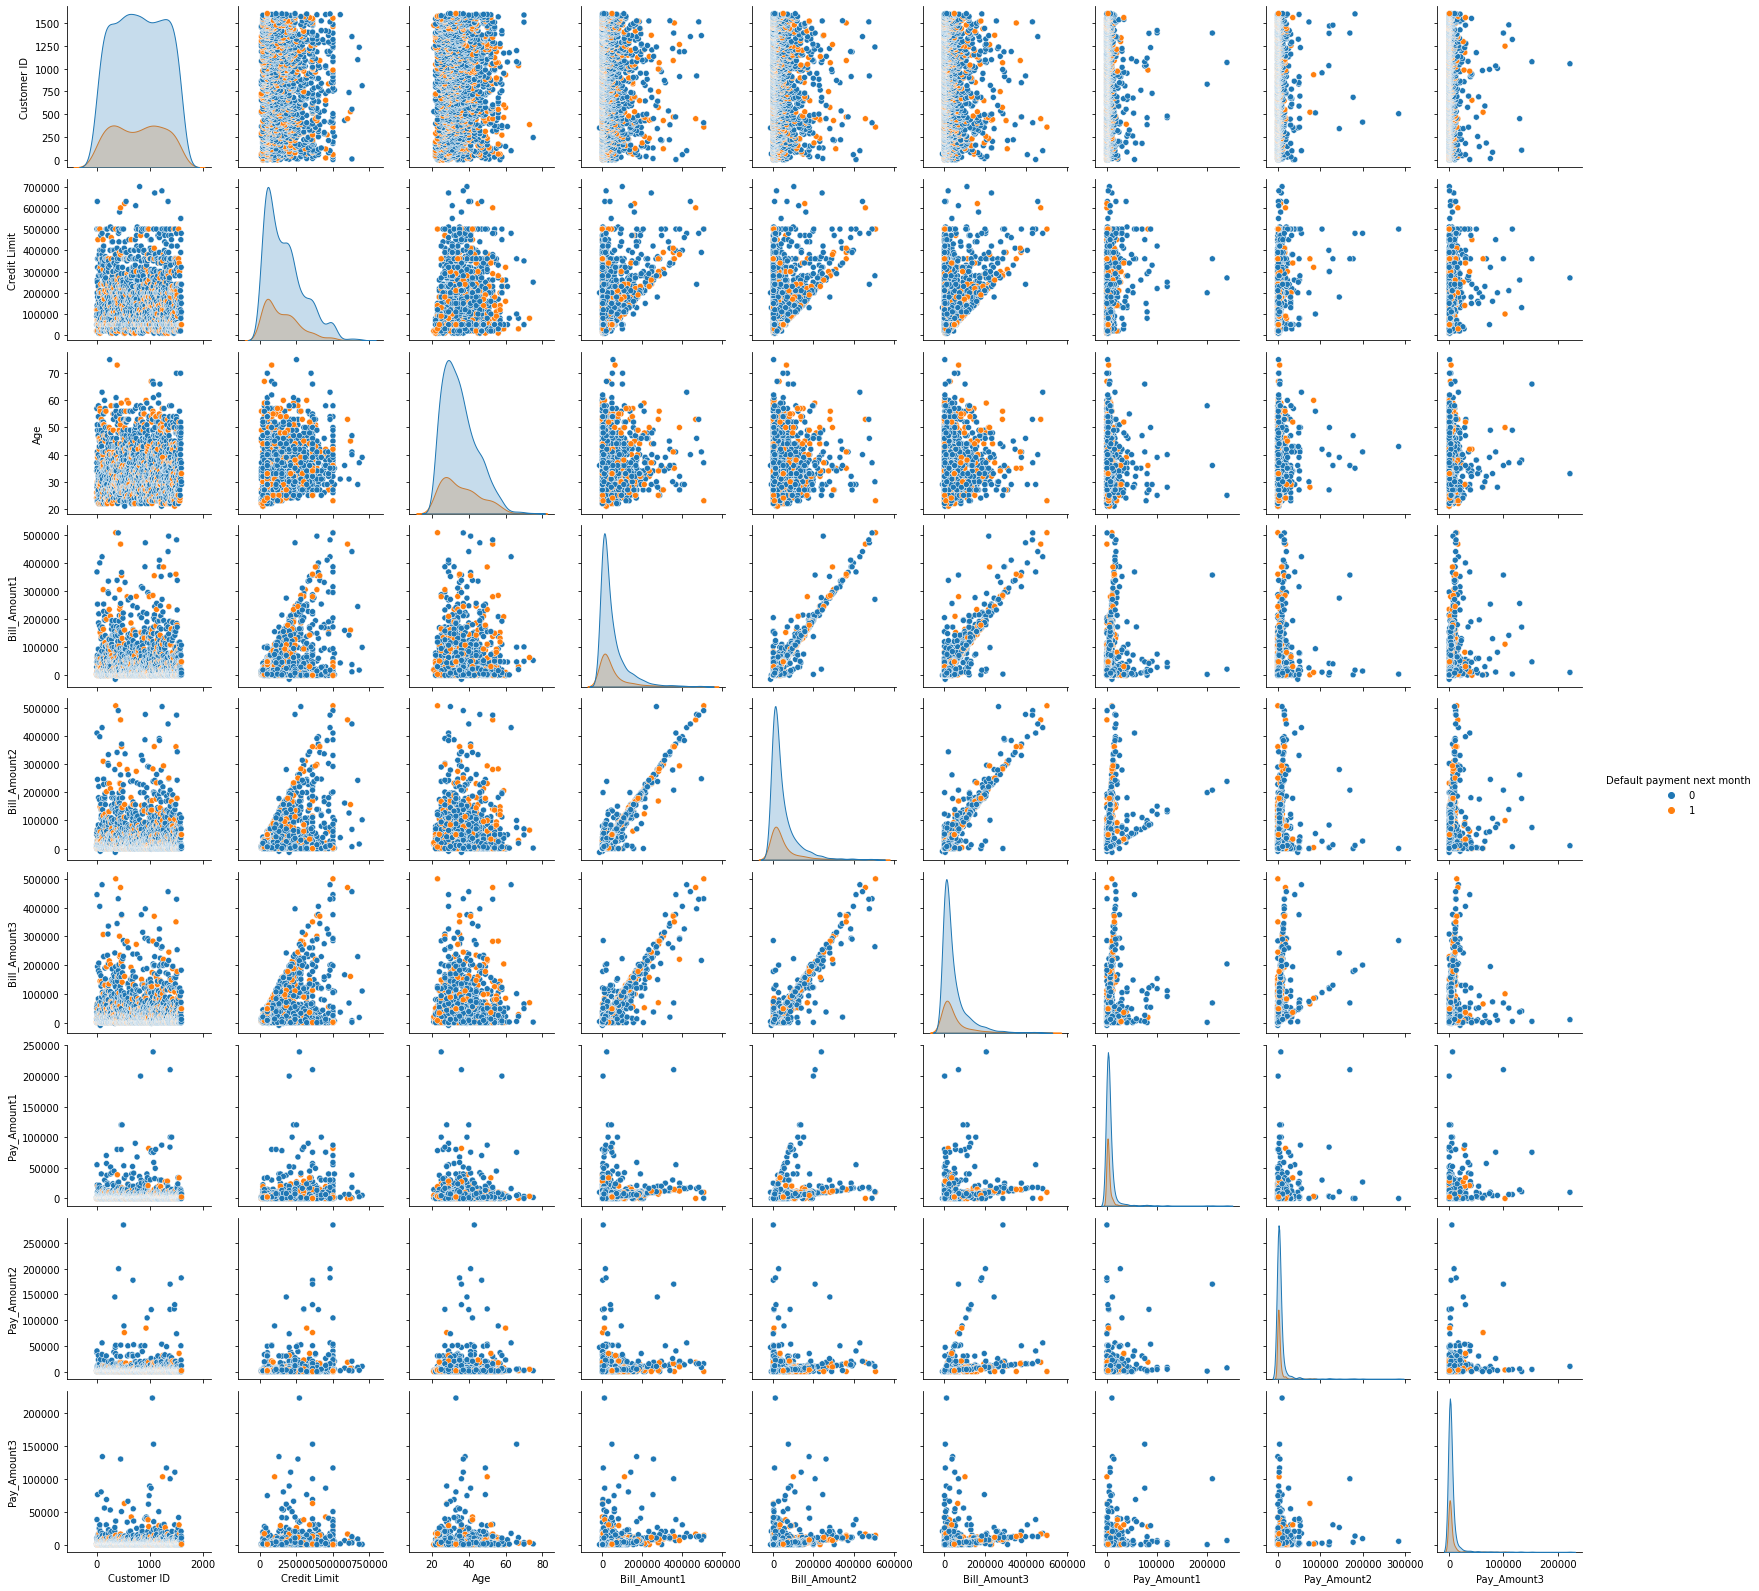

In [5]:
## doing a paiorplot to see the relationship betweeen the variables

sns.pairplot(df, hue='Default payment next month')

C:\Users\jwchi\AppData\Local\Temp\ipykernel_25328\1648061180.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


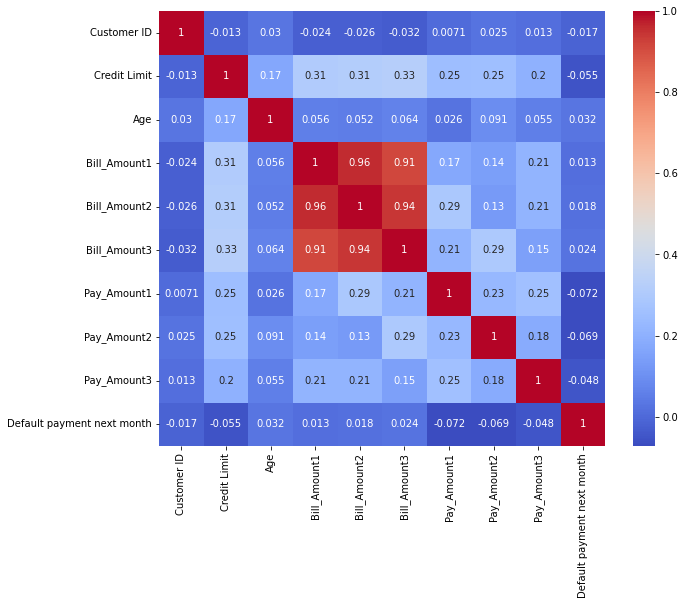

In [6]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

#### from this heatmap we know that we can drop customer ID that does not have a clear correlation 
We can see that Bill amount 1 and 2 has a high correlation value at 0.96

We can see that Bill amount 2 and 3 has a high correlation value at 0.94

We can see that Bill amount 1 and 3 has a high correlation value at 0.91

In regards to the other variables, there is no clear correlations between them

In [7]:
# Use the describe() function to compute descriptive statistics
statistics = df.describe()

# Print the statistics
display(statistics)

,Customer ID,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,800.50000,166787.500000,35.224375,49263.408125,47726.644375,44531.051875,5547.646250,5230.494375,4451.610625,0.212500
std,462.02453,129944.635707,9.404550,72687.106917,71476.217397,67164.064239,14085.471957,15569.605419,12491.715387,0.409205
min,1.00000,10000.000000,21.000000,-14386.000000,-13543.000000,-9850.000000,0.000000,0.000000,0.000000,0.000000
25%,400.75000,50000.000000,28.000000,3138.000000,3288.250000,2321.500000,1000.000000,468.500000,226.500000,0.000000
50%,800.50000,140000.000000,34.000000,20320.500000,19769.500000,19332.500000,2176.500000,1904.000000,1313.500000,0.000000
75%,1200.25000,230000.000000,41.000000,61602.750000,59891.750000,53857.250000,5021.000000,4592.500000,4000.000000,0.000000
max,1600.00000,700000.000000,75.000000,507726.000000,509229.000000,499936.000000,239104.000000,285138.000000,222750.000000,1.000000


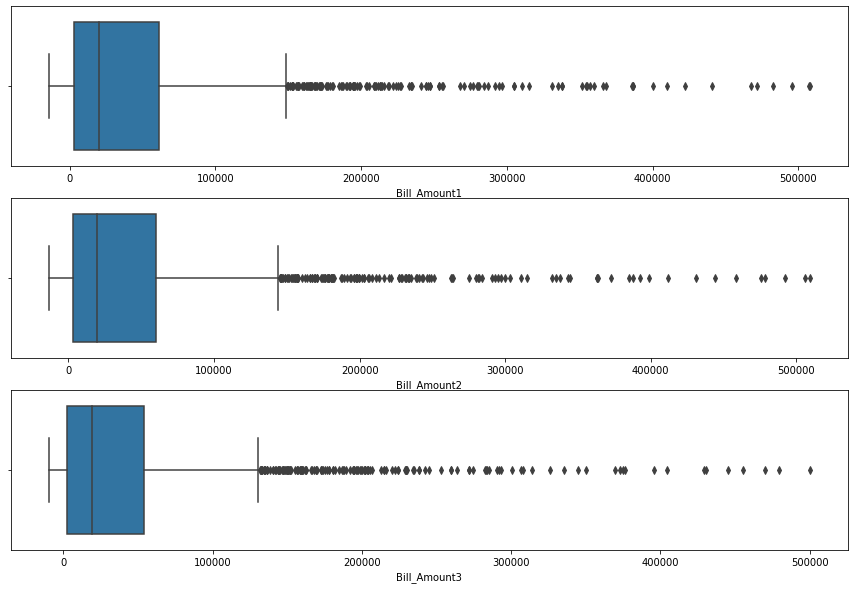

In [8]:
fig, ax = plt.subplots(3,1, figsize = (15,10))

sns.boxplot(data = df, ax = ax[0], x = "Bill_Amount1")
sns.boxplot(data = df, ax = ax[1], x = "Bill_Amount2")
sns.boxplot(data = df, ax = ax[2], x = "Bill_Amount3")

plt.show()

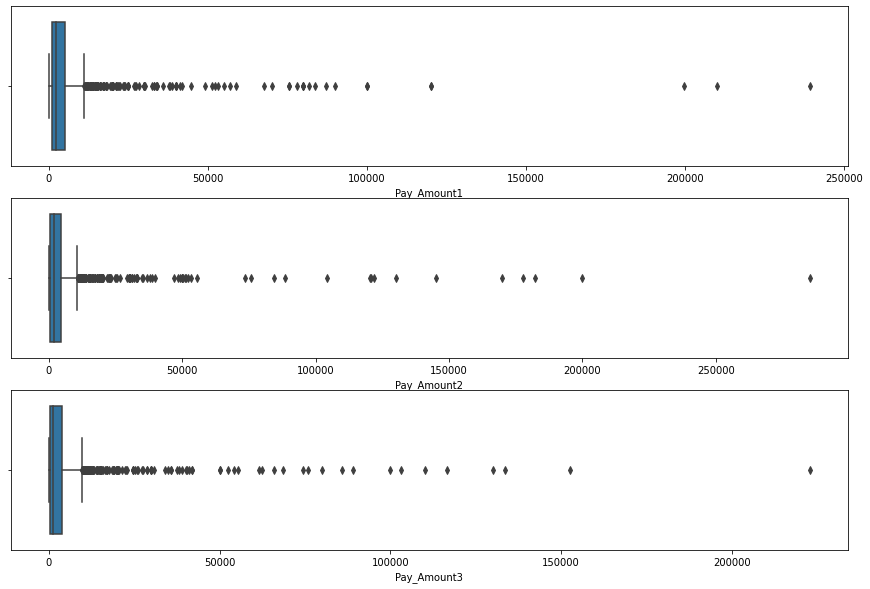

In [9]:
fig, ax = plt.subplots(3,1, figsize = (15,10))

sns.boxplot(data = df, ax = ax[0], x = "Pay_Amount1")
sns.boxplot(data = df, ax = ax[1], x = "Pay_Amount2")
sns.boxplot(data = df, ax = ax[2], x = "Pay_Amount3")

plt.show()

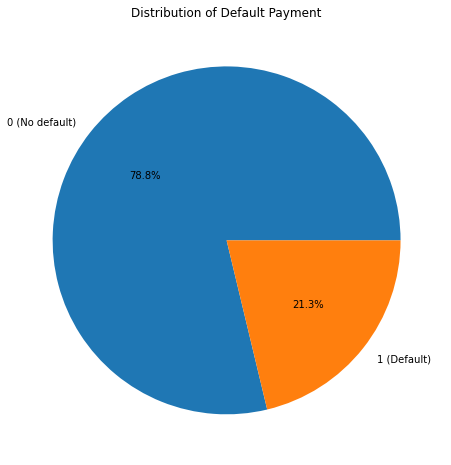

In [10]:
fig = plt.figure(figsize=(8, 8))

class_counts = df['Default payment next month'].value_counts(normalize=True) * 100
labels = ['0 (No default)', '1 (Default)']
plt.pie(class_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Default Payment')
plt.show()

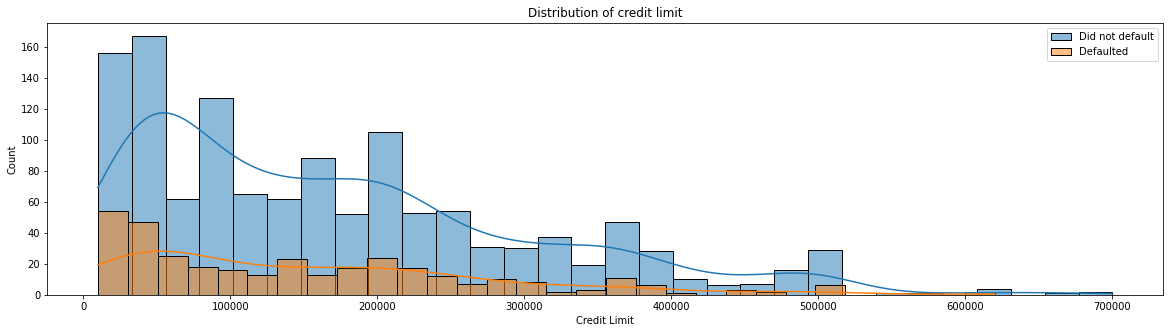

In [11]:
fig, ax = plt.subplots(figsize = (20,5))
fig = sns.histplot(df[df['Default payment next month']==0]['Credit Limit'], kde=True, bins=30, label= "Did not default")
fig2 = sns.histplot(df[df['Default payment next month']==1]['Credit Limit'], kde=True, bins=30, label= "Defaulted")
plt.title('Distribution of credit limit')
plt.legend()
plt.show()

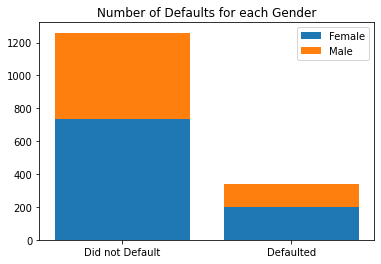

In [12]:
# Calculate the counts of defaults for each gender
gender_defaults = df.groupby(['Default payment next month', 'Gender']).size().unstack()

# Extract the counts for default = 0 and default = 1
genderF0, genderM0 = gender_defaults.loc[0]
genderF1, genderM1 = gender_defaults.loc[1]

# Plot the bar chart
x = ['Did not Default', 'Defaulted']
y1 = [genderF0, genderF1]
y2 = [genderM0, genderM1]

plt.bar(x, y1, label='Female')
plt.bar(x, y2, bottom=y1, label='Male')
plt.title("Number of Defaults for each Gender")
plt.legend()
plt.show()

#### this shows that the dataset has more people not defaulting next month this is a concern that we need to take note

### Looking default payment rate by education levels

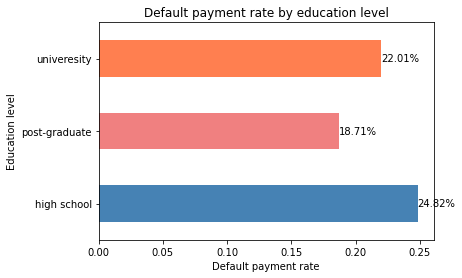

In [13]:
# Calculate the default payment rate by education level
grouped_data = df.groupby('Education')['Default payment next month'].mean()

# Plot a horizontal bar chart
colors = ['steelblue', 'lightcoral', 'coral']
grouped_data.plot(kind='barh', color=colors)

plt.xlabel('Default payment rate')
plt.ylabel('Education level')
plt.title('Default payment rate by education level')

# Add data labels to the bars
for i, v in enumerate(grouped_data):
    plt.text(v, i, f"{v:.2%}", va='center', color='black')

plt.show()

<h1>Question: How do you represent your data as features?

## Data Preprocessing & Feature Engineering

In [14]:
# defining variable X and y
X= df.drop(['Default payment next month','Customer ID'], axis=1)

y= df['Default payment next month']

### Add columns such a mean bill, mean pay, exceeded mean bill

In [15]:
### adding a new column to see (bill amount 1,2 and 3) and (adding pay amount 1,2 and 3) 
X['Row_Mean_Bill'] = X[['Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3']].mean(axis=1)

X['Row_Mean_Pay'] = X[['Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3']].mean(axis=1)

X['Exceeded_Mean_Bill'] = X['Row_Mean_Bill'] > X['Row_Mean_Pay']
X['Exceeded_Mean_Bill'] = X['Exceeded_Mean_Bill'].astype(int)

display(X)

,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Row_Mean_Bill,Row_Mean_Pay,Exceeded_Mean_Bill
0,20000,female,univeresity,married,24,3913,3102,689,0,689,0,2568.000000,229.666667,1
1,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000,2363.000000,666.666667,1
2,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000,18941.666667,1339.333333,1
3,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200,48171.333333,1739.666667,1
4,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000,16707.333333,16227.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,480000,female,univeresity,married,35,18214,11031,182123,0,182123,12960,70456.000000,65027.666667,1
1596,150000,female,univeresity,married,37,1184,794,2756,0,2772,0,1578.000000,924.000000,1
1597,110000,female,post-graduate,single,29,107195,109443,106637,7845,4000,4000,107758.333333,5281.666667,1
1598,240000,male,post-graduate,single,30,7744,7284,11234,7305,11263,10018,8754.000000,9528.666667,0


In [16]:
print(X.shape)

(1600, 14)


###  I decided to use pandas method to generate original category becomes a separate binary column with 0s and 1s representing the presence or absence of that category in each row.

In [17]:
encoded_data = pd.get_dummies(X, columns= ['Gender', 'Education', 'Marriage Status'], drop_first=True)
display(encoded_data)

print(df.shape)
print(encoded_data.shape)

,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Row_Mean_Bill,Row_Mean_Pay,Exceeded_Mean_Bill,Gender_male,Education_post-graduate,Education_univeresity,Marriage Status_single
0,20000,24,3913,3102,689,0,689,0,2568.000000,229.666667,1,0,0,1,0
1,120000,26,2682,1725,2682,0,1000,1000,2363.000000,666.666667,1,0,0,1,1
2,90000,34,29239,14027,13559,1518,1500,1000,18941.666667,1339.333333,1,0,0,1,1
3,50000,37,46990,48233,49291,2000,2019,1200,48171.333333,1739.666667,1,0,0,1,0
4,50000,57,8617,5670,35835,2000,36681,10000,16707.333333,16227.000000,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,480000,35,18214,11031,182123,0,182123,12960,70456.000000,65027.666667,1,0,0,1,0
1596,150000,37,1184,794,2756,0,2772,0,1578.000000,924.000000,1,0,0,1,0
1597,110000,29,107195,109443,106637,7845,4000,4000,107758.333333,5281.666667,1,0,1,0,1
1598,240000,30,7744,7284,11234,7305,11263,10018,8754.000000,9528.666667,0,1,1,0,1


(1600, 13)
(1600, 15)


## Setting train test split at 42 gives optimal result and will not allow the train test to change if ran again

In [18]:
# split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    encoded_data, y, test_size=0.3, random_state=42, stratify=y)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1120, 15)
(480, 15)
(1120,)
(480,)


### Only scaling the first 10 cols and not the encoded data
- MinMaxScaler preserves the shape of the original distribution

In [20]:
scaler = MinMaxScaler()
X_train.iloc[:, :10] = scaler.fit_transform(X_train.iloc[:, :10])
X_test.iloc[:, :10] = scaler.transform(X_test.iloc[:, :10])

In [21]:
X_train

,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Row_Mean_Bill,Row_Mean_Pay,Exceeded_Mean_Bill,Gender_male,Education_post-graduate,Education_univeresity,Marriage Status_single
1235,0.029851,0.634615,0.055477,0.066689,0.073331,0.008095,0.011924,0.011349,0.064074,0.015892,1,1,0,1,1
1005,0.194030,0.153846,0.009686,0.028897,0.022292,0.009638,0.005338,0.011582,0.019190,0.012763,1,1,1,0,1
1313,0.626866,0.192308,0.062504,0.094697,0.103710,0.047619,0.017535,0.024871,0.085943,0.042792,1,1,1,0,1
1076,0.731343,0.115385,0.404527,0.407449,0.406835,0.035400,0.022242,0.023686,0.405578,0.039692,1,1,1,0,1
1034,0.074627,0.346154,0.000902,0.015258,0.014771,0.000000,0.000000,0.008979,0.009175,0.004167,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,0.059701,0.153846,0.024586,0.044300,0.044111,0.013333,0.000000,0.006734,0.036573,0.008958,1,0,1,0,1
11,0.373134,0.576923,0.027978,0.060723,0.038871,0.103895,0.034951,0.038532,0.041507,0.084098,1,0,1,0,1
981,0.029851,0.153846,0.071456,0.084384,0.084379,0.000000,0.000000,0.000000,0.079016,0.000000,1,1,0,1,1
414,0.701493,0.384615,0.033090,0.070346,0.411565,0.127305,0.701352,0.040552,0.170084,0.491144,1,0,0,0,0


In [22]:
X_test

,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Row_Mean_Bill,Row_Mean_Pay,Exceeded_Mean_Bill,Gender_male,Education_post-graduate,Education_univeresity,Marriage Status_single
258,0.134328,0.423077,0.125891,0.018976,0.019322,0.000000,0.000000,0.000000,0.053397,0.000000,1,0,0,0,0
1430,0.059701,0.153846,0.102969,0.115368,0.116202,0.010476,0.004180,0.004489,0.110490,0.009150,1,0,1,0,0
1090,0.089552,0.326923,0.048218,0.064453,0.067615,0.006652,0.004945,0.004031,0.059015,0.007719,1,0,0,1,1
1011,0.597015,0.192308,0.009307,0.022908,0.020558,0.009767,0.000018,0.001194,0.016466,0.004838,1,0,1,0,0
253,0.223881,0.134615,0.141729,0.111022,0.074349,0.033533,0.007014,0.004489,0.107995,0.020921,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,0.417910,0.250000,0.188030,0.207209,0.221497,0.028571,0.024550,0.022447,0.204654,0.037500,1,0,1,0,0
584,0.059701,0.403846,0.102604,0.117030,0.115658,0.010476,0.005611,0.007632,0.110750,0.011458,1,1,0,1,1
1570,0.253731,0.461538,0.051793,0.066190,0.063707,0.007143,0.005261,0.004489,0.059491,0.008333,1,1,0,0,0
629,0.283582,0.461538,0.012615,0.032812,0.026884,0.034252,0.013520,0.015313,0.023007,0.030123,1,0,0,0,0


### Using oversampling to resample my train data as it is imbalanced
- Randomly select samples from the minority class: To address the class imbalance, the RandomOverSampler randomly selects instances from the minority class with replacement. Replacement allows the same instance to be selected multiple times, effectively duplicating instances.
- Increase the number of minority class instances: The selected instances from the minority class are duplicated or synthesized to increase the number of instances in the minority class. The duplication process randomly replicates the selected instances, while the synthesis process uses techniques like interpolation or extrapolation to generate new synthetic instances.

In [23]:
# Apply RandomOverSampler to oversample the minority class
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Calculate the class distribution after resampling
unique_classes, class_counts = np.unique(y_resampled, return_counts=True)
class_distribution = dict(zip(unique_classes, class_counts))

print("Default distribution after resampling:")
print(class_distribution)

Default distribution after resampling:
{0: 882, 1: 882}


In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_resampled.shape)
print(y_resampled.shape)
print(X_test.shape)
print(y_test.shape)

(1120, 15)
(1120,)
(1764, 15)
(1764,)
(480, 15)
(480,)


In [25]:
X_resampled

,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Row_Mean_Bill,Row_Mean_Pay,Exceeded_Mean_Bill,Gender_male,Education_post-graduate,Education_univeresity,Marriage Status_single
0,0.029851,0.634615,0.055477,0.066689,0.073331,0.008095,0.011924,0.011349,0.064074,0.015892,1,1,0,1,1
1,0.194030,0.153846,0.009686,0.028897,0.022292,0.009638,0.005338,0.011582,0.019190,0.012763,1,1,1,0,1
2,0.626866,0.192308,0.062504,0.094697,0.103710,0.047619,0.017535,0.024871,0.085943,0.042792,1,1,1,0,1
3,0.731343,0.115385,0.404527,0.407449,0.406835,0.035400,0.022242,0.023686,0.405578,0.039692,1,1,1,0,1
4,0.074627,0.346154,0.000902,0.015258,0.014771,0.000000,0.000000,0.008979,0.009175,0.004167,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,0.283582,0.692308,0.303141,0.305543,0.301942,0.000000,0.000000,0.036911,0.302734,0.017129,1,1,1,0,0
1760,0.014925,0.326923,0.039184,0.056286,0.057689,0.008090,0.005120,0.002810,0.049967,0.007885,1,1,0,1,0
1761,0.029851,0.653846,0.061362,0.077528,0.077748,0.007619,0.005559,0.006182,0.071153,0.009504,1,0,0,0,0
1762,0.074627,0.173077,0.055567,0.071898,0.074459,0.007505,0.004254,0.002909,0.066238,0.007160,1,1,0,0,1


<h1> Question: How do i plan to evaluate my system.</h1>

- Objective:
    Build a classification model to predict which customer will have default payment in the next month.
- Plan: 
    Want to have true positives, to actually know if the customer actually defaults<br>
    Want to have true negatives as well, to know that the customer didnt actually default.



## Accuracy = (TP + TN) / (TP + TN + FP + FN)

- Accuracy gives you an overall view of how well the model performs but may not provide a complete picture, especially when dealing with imbalanced datasets.
- Accuracy: Accuracy measures the overall correctness of the model's predictions. It is the ratio of correctly classified instances to the total number of instances in the dataset.


## Precision = TP / (TP + FP)

- Precision focuses on the quality of positive predictions, aiming to minimize false positives.
- Precision: Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It helps assess the model's ability to avoid false positives.

## Recall = TP / (TP + FN)

- Recall focuses on the coverage of actual positive instances, aiming to minimize false negatives.
- Recall (Sensitivity or True Positive Rate): Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. It indicates the model's ability to identify positive cases.


## F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

- The F1 score ranges from 0 to 1, with 1 being the best value. It is a useful metric when you want to evaluate the model's performance in terms of both positive predictions and the coverage of actual positive instances.
- F1 Score: The F1 score is a harmonic mean of precision and recall. It provides a balance between the two metrics and is useful when you want to consider both precision and recall simultaneously.
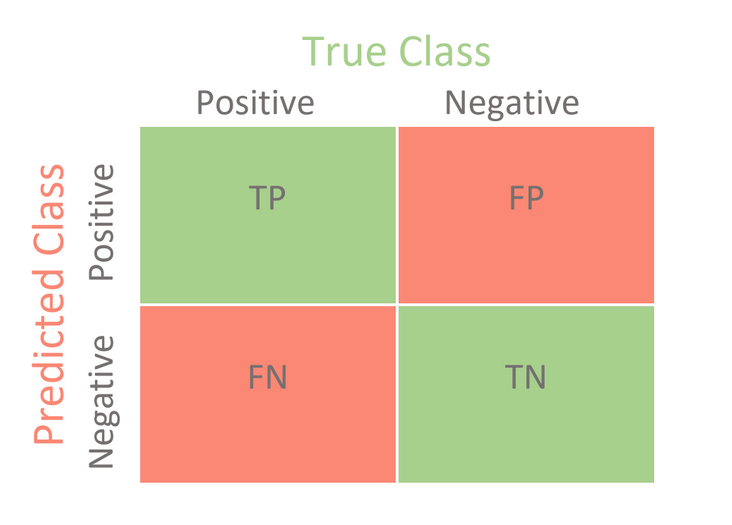

## I want to correctly identify the defaulters but also not incorrectly identify those that didnt default.
therefore I chose to look at <b>f1 score<b> to evaluate my system

<h1> Question: How did you select which learning algorithms to use?


### I selected some common models used such as Logistic regression, KNN, SVM. 
### I also selected a few ensemble classfiers like Random forest as they
- Generally more robust and less prone to overfitting compared to single models. 
- Can mitigate the bias and variance trade-off that exists in machine learning models.

### I also selected tree based models like Decision tree classifier as they
- Make fewer assumptions about the data distribution compared to parametric models. They are considered non-parametric models and do not assume linearity, normality, or other specific distributional characteristics.
- Can handle a wide range of data types.

## Using resampled data 

In [26]:
clfs = [('LogisticRegression', LogisticRegression()),
       ('KNeighborsClassifier', KNeighborsClassifier()),
       ('SVM',SVC()),
       ('AdaBoostClassifier', AdaBoostClassifier()),
       ('RandomForestClassifier', RandomForestClassifier()), 
       ('DecisionTreeClassifier', DecisionTreeClassifier()),
       ('GradientBoostingClassifier', GradientBoostingClassifier()),
       ("GaussianNB", GaussianNB())
]

pipelines = []

scores_df = pd.DataFrame(columns=['Model', 'F1_Score','Precision','Recall','Accuracy'])

for clf_name, clf in clfs:
    pipeline = Pipeline(steps=[
                              ('classifier', clf)])
    pipeline.fit(X_resampled, y_resampled)
    y_pred = pipeline.predict(X_test)
    
    pipelines.append(pipeline)

    newRow = {'Model':clf_name,
             'F1_Score': metrics.f1_score(y_test, y_pred, average='weighted'),
             'Precision': metrics.precision_score(y_test, y_pred, average='weighted'),
             'Recall': metrics.recall_score(y_test, y_pred, average='macro'),
             'Accuracy': metrics.accuracy_score(y_test, y_pred),
             'ROC_AUC_Score': roc_auc_score(y_test, y_pred)
             }
    #scores_df = scores_df.append(newRow, ignore_index=True)
    scores_df = pd.concat([scores_df, pd.DataFrame([newRow])], ignore_index=True)
    print(f'{clf_name}\n{classification_report(y_test, y_pred, zero_division=1)}')

display(scores_df)



LogisticRegression
              precision    recall  f1-score   support

           0       0.81      0.49      0.61       378
           1       0.23      0.57      0.33       102

    accuracy                           0.51       480
   macro avg       0.52      0.53      0.47       480
weighted avg       0.69      0.51      0.55       480

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.79      0.51      0.62       378
           1       0.21      0.50      0.30       102

    accuracy                           0.50       480
   macro avg       0.50      0.50      0.46       480
weighted avg       0.67      0.50      0.55       480

SVM
              precision    recall  f1-score   support

           0       0.78      0.61      0.69       378
           1       0.19      0.34      0.25       102

    accuracy                           0.56       480
   macro avg       0.48      0.48      0.47       480
weighted avg       0.65      0

,Model,F1_Score,Precision,Recall,Accuracy,ROC_AUC_Score
0,LogisticRegression,0.549855,0.685294,0.529023,0.506250,0.529023
1,KNeighborsClassifier,0.548952,0.667075,0.502646,0.504167,0.502646
2,SVM,0.592296,0.652128,0.478447,0.556250,0.478447
3,AdaBoostClassifier,0.662242,0.716963,0.584656,0.633333,0.584656
4,RandomForestClassifier,0.721884,0.706502,0.543262,0.754167,0.543262
5,DecisionTreeClassifier,0.693168,0.705023,0.562714,0.683333,0.562714
6,GradientBoostingClassifier,0.704778,0.726432,0.598895,0.689583,0.598895
7,GaussianNB,0.226705,0.763673,0.533302,0.287500,0.533302


## Learning curve

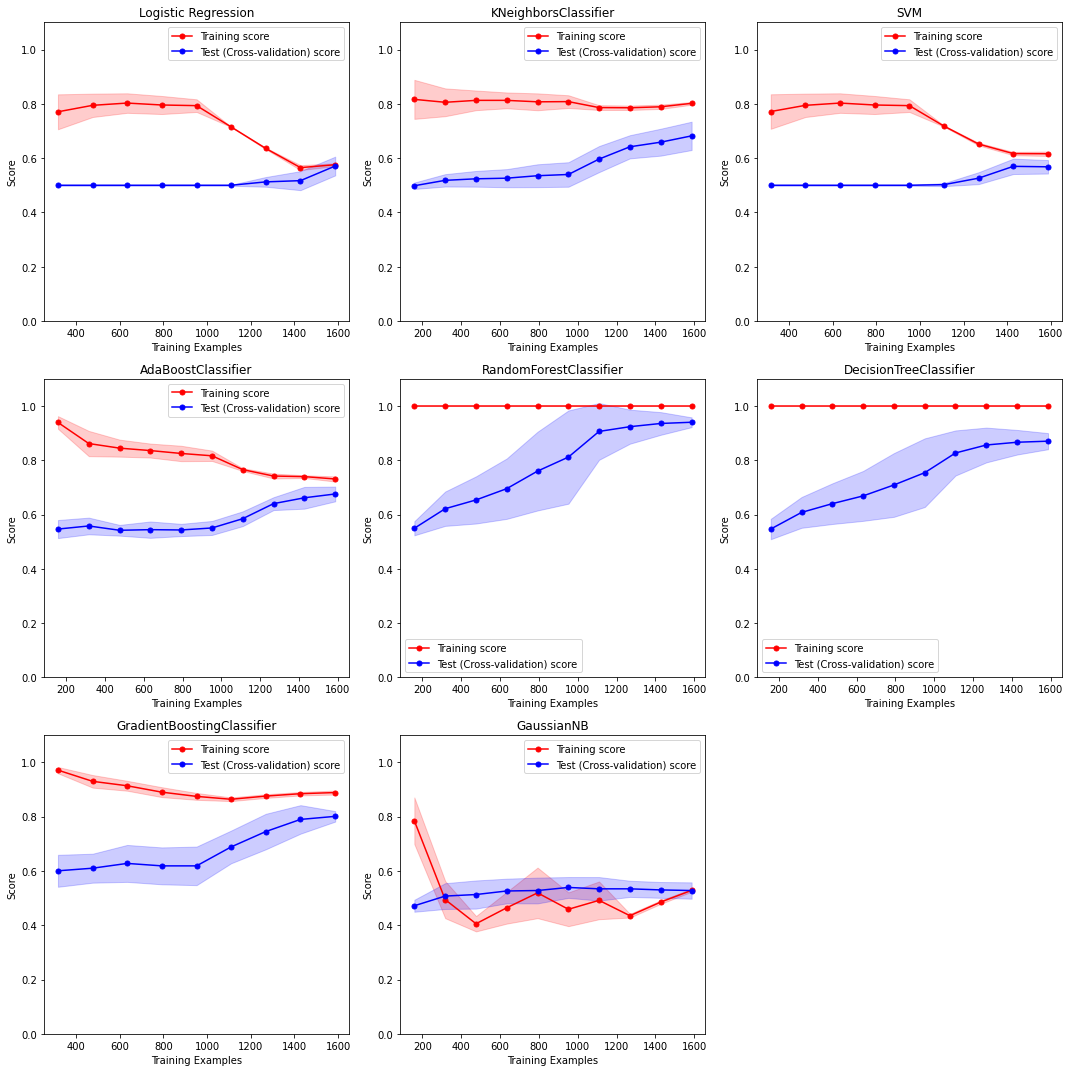

In [27]:
# Create models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVM": SVC(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "GaussianNB": GaussianNB(),
}


num_plots = len(models)
num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

for i, (model_name, model) in enumerate(models.items()):
    row = i // 3  # Determine the row index
    col = i % 3   # Determine the column index

    train_sizes, train_scores, test_scores = learning_curve(
        model, X_resampled, y_resampled, cv=10, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate the mean and standard deviation of training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve on the appropriate subplot
    ax = axes[row, col]
    ax.set_title(model_name)
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("Score")
    ax.set_ylim(0.0, 1.1)
    ax.plot(
        train_sizes,
        train_mean,
        label="Training score",
        color="r",
        marker="o",
        markersize=5,
    )
    ax.fill_between(
        train_sizes,
        train_mean - train_std,
        train_mean + train_std,
        alpha=0.2,
        color="r",
    )
    ax.plot(
        train_sizes,
        test_mean,
        label="Test (Cross-validation) score",
        color="b",
        marker="o",
        markersize=5,
    )
    ax.fill_between(
        train_sizes,
        test_mean - test_std,
        test_mean + test_std,
        alpha=0.2,
        color="b",
    )
    ax.legend(loc="best")

# Remove empty subplots if there are any
if num_plots % 3 != 0:
    for i in range(num_plots, num_rows * 3):
        fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()


<h1> Question: How well does your system compare to a dummy baseline?

### My dummy base line has a low f1 score of 0.5 compared to my base models. It also has a low ROC score of 0.5, it is basically guessing the results

### Dummy classifier

In [28]:
dummy = DummyClassifier()
dummy.fit(X_resampled, y_resampled)
y_pred = dummy.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1_score:", f1)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
roc = roc_auc_score(y_test, y_pred)
print("ROC:", roc)

F1_score: 0.6938811188811188
Precision: 0.6201562500000001
Recall: 0.5
Accuracy: 0.7875
ROC: 0.5


c:\Users\jwchi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h1> Question: Did you try to tune the hyperparameters of the learning algorithm, and in 
that case how? 

### I tuned my top 2 models using GridSearchCV and specified my param grid. I ranked the results by training accuracy and took the best params to fit into my model.

### Tuning the 2 best models
Random Forest Classifer<br>
Gradient Boosting Classifier

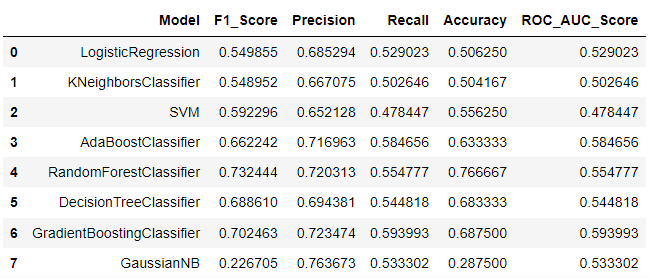

## Random forest classifier

In [29]:
RFC = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 3,4,5,7,9],
    'min_samples_leaf': [1, 3,5,7 ]
}

grid_search = GridSearchCV(RFC, param_grid, n_jobs=-1).fit(X_resampled, y_resampled)
results = pd.DataFrame(grid_search.cv_results_)
display(results.sort_values(by='rank_test_score'))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
242,0.383698,0.028611,0.016839,0.001439,7,1,2,100,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.801700,0.855524,0.847025,0.824363,0.809659,0.827654,0.020786,1
258,0.768950,0.073849,0.029581,0.001525,7,1,5,200,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.798867,0.844193,0.852691,0.804533,0.809659,0.821988,0.022032,2
247,0.361713,0.015514,0.017034,0.001594,7,1,3,100,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.787535,0.835694,0.844193,0.824363,0.812500,0.820857,0.019785,3
244,1.195210,0.115770,0.046721,0.008239,7,1,2,300,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.796034,0.841360,0.849858,0.810198,0.806818,0.820854,0.020920,4
254,1.084431,0.106891,0.044025,0.004874,7,1,4,300,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.801700,0.830028,0.847025,0.796034,0.806818,0.816321,0.019216,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.045285,0.010330,0.004310,0.001132,3,7,9,10,"{'max_depth': 3, 'min_samples_leaf': 7, 'min_s...",0.592068,0.606232,0.645892,0.603399,0.636364,0.616791,0.020650,356
105,0.040755,0.005430,0.012272,0.009397,3,7,5,10,"{'max_depth': 3, 'min_samples_leaf': 7, 'min_s...",0.611898,0.645892,0.631728,0.609065,0.582386,0.616194,0.021613,357
45,0.041791,0.014558,0.004315,0.000751,3,3,5,10,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_s...",0.611898,0.620397,0.594901,0.606232,0.639205,0.614526,0.014862,358
10,0.036139,0.002982,0.006541,0.003115,3,1,4,10,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.611898,0.597734,0.609065,0.589235,0.642045,0.609995,0.017961,359


In [30]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=7)


F1 score: 0.7133329774525478
Accuracy: 0.6979166666666666


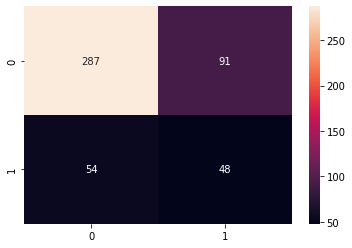

In [31]:
RFC = RandomForestClassifier(max_depth=7,min_samples_split=3 ,n_estimators=200)

RFC.fit(X_resampled, y_resampled)

y_pred = RFC.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.show()

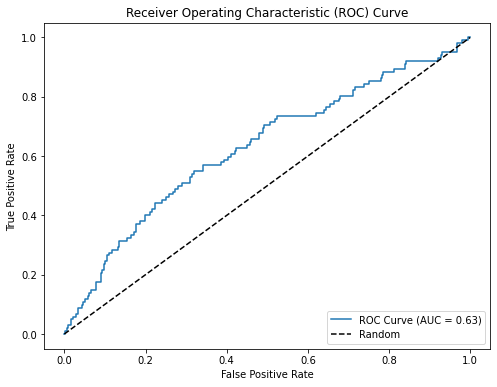

In [32]:
RFC = RandomForestClassifier(max_depth=7, min_samples_split=3 ,n_estimators=200)

RFC.fit(X_resampled, y_resampled)

# Get predicted probabilities for the positive class (class 1)
y_scores = RFC.predict_proba(X_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute the Area Under the ROC Curve (AUC)
auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Gradient boosting classifier

In [33]:
# Create the Gradient Boosting Classifier
GBC = GradientBoostingClassifier()

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
}

grid_search = GridSearchCV(GBC, param_grid, cv=5 ,n_jobs=-1).fit(X_resampled, y_resampled)
results = pd.DataFrame(grid_search.cv_results_)
display(results.sort_values(by='rank_test_score'))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
80,2.080439,0.062955,0.003406,0.000204,0.2,5,3,300,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...",0.883853,0.920680,0.923513,0.926346,0.900568,0.910992,0.016319,1
76,1.871823,0.217583,0.004002,0.000316,0.2,5,2,200,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...",0.881020,0.903683,0.932011,0.920680,0.906250,0.908729,0.017230,2
79,1.644310,0.083773,0.004147,0.000909,0.2,5,3,200,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...",0.881020,0.920680,0.917847,0.912181,0.909091,0.908164,0.014172,3
47,2.697413,0.228354,0.005308,0.000512,0.1,5,1,300,"{'learning_rate': 0.1, 'max_depth': 5, 'min_sa...",0.883853,0.903683,0.926346,0.909348,0.897727,0.904191,0.013951,4
74,2.890218,0.352323,0.005826,0.000858,0.2,5,1,300,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...",0.881020,0.889518,0.920680,0.923513,0.903409,0.903628,0.016712,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.165043,0.137222,0.003806,0.000515,0.01,3,2,200,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.682720,0.745042,0.699717,0.694051,0.707386,0.705783,0.021214,77
7,1.115776,0.101500,0.003812,0.000936,0.01,3,3,200,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.679887,0.745042,0.699717,0.688385,0.707386,0.704084,0.022537,78
3,0.585065,0.074974,0.003007,0.000542,0.01,3,2,100,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.651558,0.694051,0.626062,0.665722,0.713068,0.670092,0.030732,79
6,0.541337,0.043558,0.003108,0.000380,0.01,3,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.654391,0.694051,0.634561,0.665722,0.701705,0.670086,0.024906,80


In [34]:
print(grid_search.best_estimator_)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=3,
                           n_estimators=300)


F1 score: 0.7407596505725417
Accuracy: 0.7583333333333333


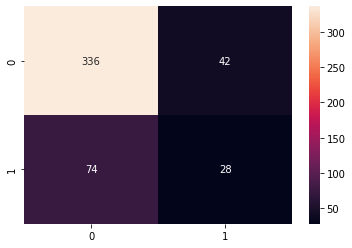

In [35]:
GBC = GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=3, n_estimators=200)

GBC.fit(X_resampled, y_resampled)

y_pred = GBC.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.show()

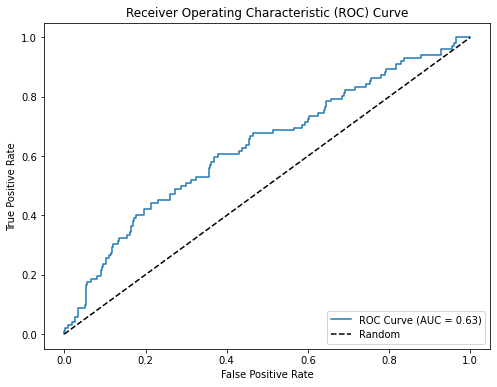

In [36]:
GBC = GradientBoostingClassifier(learning_rate=0.2, max_depth=5,min_samples_leaf=3, n_estimators=200)

GBC.fit(X_resampled, y_resampled)

# Get predicted probabilities for the positive class (class 1)
y_scores = GBC.predict_proba(X_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute the Area Under the ROC Curve (AUC)
auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<h1> Conclusion: </h1>
<h3> Therefore i conclude that Gradient Boost is the best model </h3>
- Highest f1 score after tuning <br>
- Least type 1 and 2 errors <br>
- Best ROC score after tuning 

<h1> Question: Can you say anything about the errors that the system makes?

<h3> Yes. I had resampled the train data, keeping in mind that the dataset had more people not defaulting. So upon fitting it to the test data(which did not get resampled), it would not give allow me to correctly identify the people who actually default. This can be seen in the confusion matrix that showed less values in the true negative region 

<h1>Question:
Is it possible to say something about which features the model considers important?</h1>

### Feature importance:
- Random forest(top 3 are pay amount 1, bill amount 3, row mean pay)
- Gradient boosting(top 3 are bill amount 1, bill amount 3, pay amount 1)

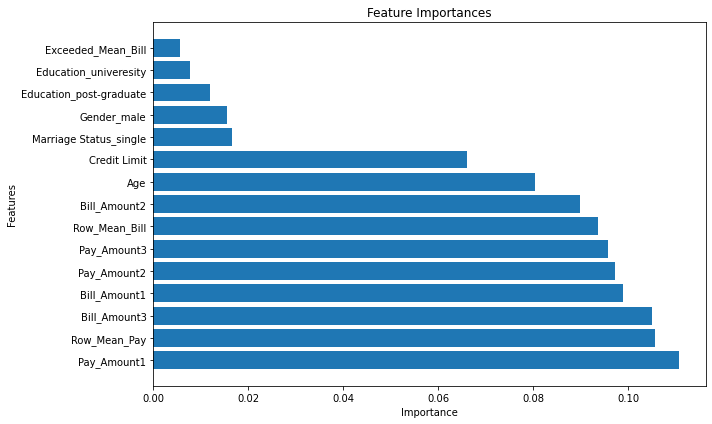

In [37]:
RFC = RandomForestClassifier(max_depth=7,min_samples_split=3 ,n_estimators=200)

RFC.fit(X_resampled, y_resampled)

# Get feature importances
importances = RFC.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of the features
feature_names = X_resampled.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_resampled.shape[1]), importances[indices], align="center")  # Horizontal bar plot
plt.yticks(range(X_resampled.shape[1]), feature_names[indices], rotation=0)  # Use yticks for feature names
plt.ylabel("Features")  # Set y-axis label
plt.xlabel("Importance")  # Set x-axis label
plt.tight_layout()
plt.show()


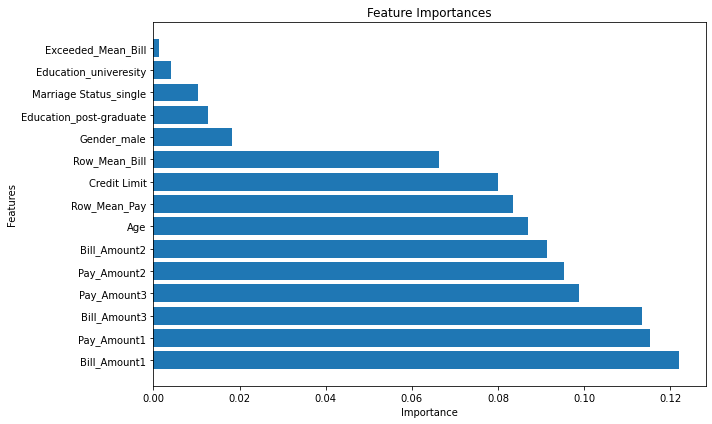

In [38]:
GBC = GradientBoostingClassifier(learning_rate=0.2, max_depth=5,min_samples_leaf=3,
                           n_estimators=200)

GBC.fit(X_resampled, y_resampled)

# Get feature importances
importances = GBC.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of the features
feature_names = X_resampled.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_resampled.shape[1]), importances[indices], align="center")  # Horizontal bar plot
plt.yticks(range(X_resampled.shape[1]), feature_names[indices], rotation=0)  # Use yticks for feature names
plt.ylabel("Features")  # Set y-axis label
plt.xlabel("Importance")  # Set x-axis label
plt.tight_layout()
plt.show()
